In [1]:
import pandas as pd

In [2]:
cs_file = '../data/SMB_input_belli_ERA5.csv'

df1 = pd.read_csv(cs_file,
   delimiter='\t', index_col=['Date'],
    parse_dates=['Date'], na_values='NAN')

cs_file = '../data/SMB_input_four_ERA5.csv'

df = pd.read_csv(cs_file,
    delimiter='\t', index_col=['Date'],
    parse_dates=['Date'], na_values='NAN')


In [30]:
df

,Stake,Latitude,Longitude,Elevation,Days,SMB,t2m,rh,u2,SWin,LWin,tp,sf,msl,press,tcc,t2m_an,PDD
Date,,,,,,,,,,,,,,,,,,
2011-03-07,PG01,-62.201488,-58.583236,435.7,5,-3.03,-1.547089,91.561660,12.955721,103.991370,288.65213,0.027941,0.004176,984.74524,934.99945,0.884296,1.111962,0.000000
2011-03-09,PG01,-62.201488,-58.583236,435.7,2,0.10,-2.051198,93.916790,10.064571,71.619350,300.07703,0.010606,0.001503,986.69165,936.83850,0.940137,0.989325,0.000000
2013-02-11,PG01,-62.201488,-58.583236,435.7,705,0.05,-6.571172,87.573740,9.982855,101.991410,264.68054,1.763367,1.475362,990.60895,940.44910,0.847065,-0.110270,0.000000
2013-02-19,PG01,-62.201488,-58.583236,435.7,8,-0.08,-2.980143,88.867760,9.313358,137.897220,287.33777,0.024997,0.017200,981.61755,931.99060,0.897450,0.763336,0.000000
2013-02-27,PG01,-62.201488,-58.583236,435.7,8,-0.01,-3.258023,85.847710,9.903598,163.349260,263.86685,0.007287,0.003915,1001.60364,950.96277,0.673365,0.695735,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-17,PG19,-62.237672,-58.633624,96.8,44,-0.43,-0.284498,85.731510,9.542617,207.966920,274.65402,0.085414,0.065327,987.89500,976.44020,0.800041,0.676566,12.224274
2016-02-25,PG19,-62.237672,-58.633624,96.8,8,-0.20,0.197350,89.256035,8.389152,127.560770,287.32523,0.027218,0.014801,978.77210,967.44150,0.913182,0.796762,4.630981
2016-03-10,PG19,-62.237672,-58.633624,96.8,14,-0.45,0.442562,91.217650,9.195325,110.797840,284.02000,0.021845,0.006020,992.81160,981.32086,0.792833,0.857929,7.281006


<AxesSubplot:>

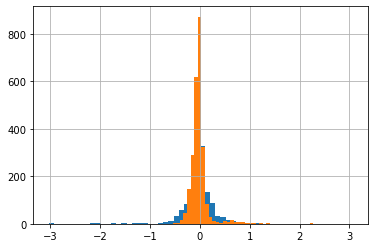

In [29]:
df['SMB'].hist(bins=50)
df1['SMB'].hist(bins=50)


<AxesSubplot:>

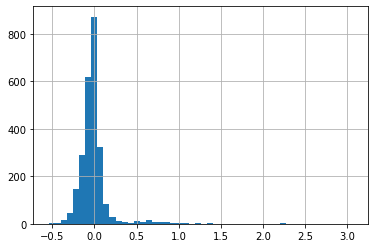

In [26]:
df1['SMB'].hist(bins=50)

In [3]:
features_to_drop = ['Stake', 'Latitude','Longitude', 'SMB']

df_train_X = df.drop(features_to_drop, axis=1)
df_train_y = df[['SMB']]

X_train, y_train = df_train_X.values, df_train_y.values

# And the same for test set
df_validation_X = df1.drop(features_to_drop, axis=1)
df_validation_y = df1[['SMB']]

X_validation, y_validation = df_validation_X.values, df_validation_y.values

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [6]:
X_train_scaled = scaler.transform(X_train)
X_validation_scaled = scaler.transform(X_validation)

In [7]:
import sys
sys.path.append('../')
from utilities.ML_algorithms import create_RF_model, create_XGB_model, create_ANN_model
from utilities.plot_results import plot_prediction 

In [8]:
%%time
RF_model = create_RF_model()
RF_model.fit(X_train, y_train)

<timed exec>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


CPU times: user 17.2 s, sys: 50.1 ms, total: 17.2 s
Wall time: 17.6 s


RandomForestRegressor(criterion='absolute_error', max_depth=6, max_features=10,
                      min_samples_split=5, n_estimators=300)

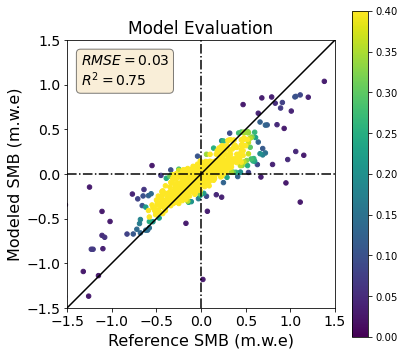

In [9]:
plot_prediction(y_train, RF_model.predict(X_train), n_toplot=5000)

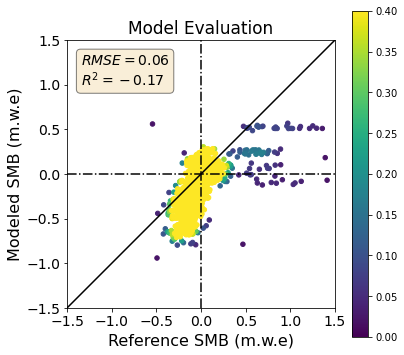

In [10]:
plot_prediction(y_validation, RF_model.predict(X_validation), n_toplot=5000)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

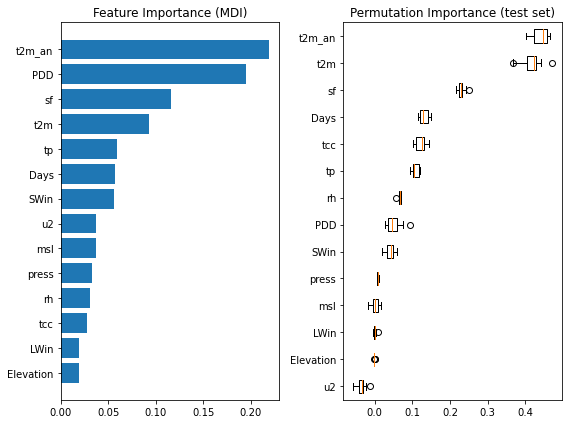

In [12]:
feature_importance = RF_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df_train_X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    RF_model, X_validation, y_validation, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df_train_X.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()


In [13]:
%%time
XGB_model = create_XGB_model()
XGB_model.fit(X_train, y_train)

/home/christian/miniconda3/envs/DL_SMB/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 7.16 s, sys: 15.8 ms, total: 7.18 s
Wall time: 7.44 s


GradientBoostingRegressor(loss='huber', max_depth=6, min_samples_split=5,
                          n_estimators=300, validation_fraction=0.2)

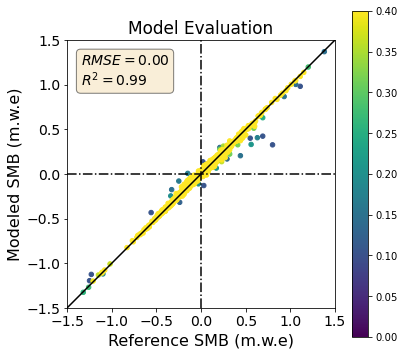

In [14]:
plot_prediction(y_train, XGB_model.predict(X_train), n_toplot=5000)

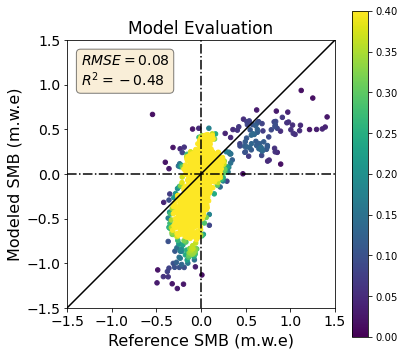

In [15]:
plot_prediction(y_validation, XGB_model.predict(X_validation), n_toplot=5000)

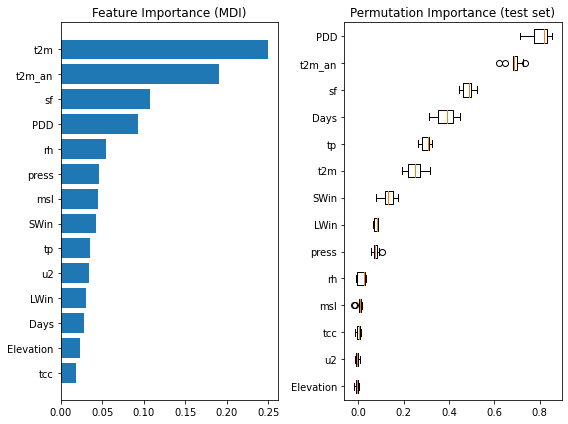

In [16]:
feature_importance = XGB_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df_train_X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    XGB_model, X_validation, y_validation, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df_train_X.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [17]:
%%time
ANN_model = create_ANN_model()
ANN_model.fit(X_train_scaled, y_train)

/home/christian/miniconda3/envs/DL_SMB/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 4.05 s, sys: 3.45 s, total: 7.51 s
Wall time: 3.5 s


/home/christian/miniconda3/envs/DL_SMB/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(batch_size=100, hidden_layer_sizes=(50, 30, 20, 10),
             learning_rate='adaptive', solver='lbfgs')

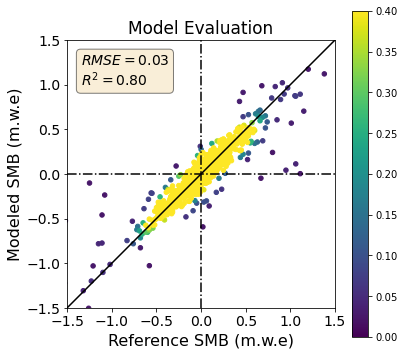

In [18]:
plot_prediction(y_train, ANN_model.predict(X_train_scaled), n_toplot=5000)

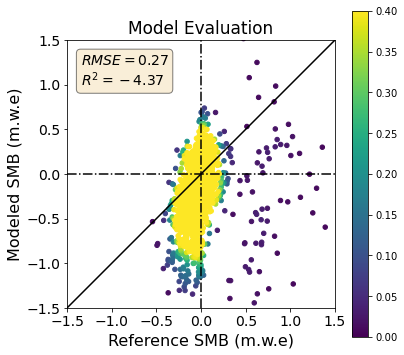

In [19]:
plot_prediction(y_validation, ANN_model.predict(X_validation_scaled), n_toplot=5000)